# Análise do dados de execução orçamentária do municipio do Rio de Janeiro
    


# 1. Introdução
 - Informação sobre o dataset: Este dataset foi retirado do site do data rio (fonte abaixo). Ele contém informações sobre a execução orçamentária do Município do Rio. Os dados compreendem o período de 2008 até início de 2019.<br>
Infelizmente não encontrei um dicionário para descrever melhor os atributos. <br>   
    Fonte dos dados: http://www.data.rio/datasets/execu%C3%A7%C3%A3o-or%C3%A7ament%C3%A1ria-despesas <br>
    
# 2. Bibliotecas     
 - Importação das Bibliotecas utilizadas <br>
 - Importação do Dataset <br>
    
# 3. Conhecendo um pouco os dados   
 - Shape do dataset  <br>
 - Atributos do Dataset  <br>
 - Olhando as primeiras linhas <br>
 - Atributos do Dataset <br>
 - Verificando valores nulos  <br>
 - Verificando valores N/A (não disponível) <br>
 - Olhando os tipos dos dados e formato dos dados <br>
 - Verificando os valores únicos <br>


# 4. Explorandos os dados
- Verificando os Totais por Exercicio. <br>
- Plotando a distribuição dos valores por Exercício. <br>
- Plotando alguns gráficos com diferentes agrupamentos. <br>

# 1. Introdução:
<h3>Contexto</h3>
O conjunto de dados original contém 156.924 linhas com 21 atributos. Alguns atributos contém apenas o código utilizado pelo município, infelizmente não consegui encontrar a decrição destes códigos.

<h3>Conteúdo</h3>
É um pouco difícil entender o conjunto de dados sem um dicionário. Porém mesmo não compreendendo totalmente o dataset (o que não é muito recomendado), decidi prosseguir com a análise com o objetivo de praticar o uso do python para análise de dados. 


# 2. Bibliotecas     
2.1 - Importação das Bibliotecas utilizadas <br>
2.2 - Importação do Dataset <br>

In [1]:
# Carregando das bibliotecas
import pandas as pd 
import locale
import matplotlib.pyplot as plt
#import warnings
import numpy as np

In [2]:
# Importando os dados.
df_execucao = pd.read_csv('./base_dados/Execução_Orçamentária_Despesas.csv')


/home/charles/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


 
# 3. Conhecendo um pouco os dados   
 - Shape do dataset  <br>
 - Atributos do Dataset  <br>
 - Olhando as primeiras linhas <br>
 - Atributos do Dataset <br>
 - Verificando valores nulos  <br>
 - Verificando valores N/A (não disponível) <br>
 - Olhando os tipos dos dados e formato dos dados <br>
 - Verificando os valores únicos <br>

In [3]:
# Shape do dataset
df_execucao.shape

(156923, 21)

In [4]:
# Olhando as primeiras linhas 
df_execucao.head()

,X,Y,OBJECTID,Exercicio,Orgao,Unidade_Orcamentaria,Programa_de_Trabalho,Acao,Descricao_Acao,Fonte_de_Recursos,...,Elemento_Despesa,Descricao_Elemento,Item_Despesa,Descricao_item_Despesa,Orcamento_Atualizado,Empenhado,Liquidado,Pago,Pago_Restos_Pagar,GlobalID
0,-43.450729,-22.923223,1,2008,10,1,10010412200012002,2002,APOIO ADMINISTRATIVO,100,...,339014,Diárias - Civil,33901400,Diárias - Civil,12525.00,0.0,0.00,0.00,0.00,97737af8-f2d6-49c0-9eca-cc176225a5b6
1,-43.450729,-22.923223,2,2008,10,1,10010412200012002,2002,APOIO ADMINISTRATIVO,100,...,339030,Material de Consumo,33903000,Material De Consumo,42965.85,0.0,0.00,0.00,0.00,2ffda3d6-2d41-4239-8e44-c0cb0277ce0a
2,-43.450729,-22.923223,3,2008,10,1,10010412200012002,2002,APOIO ADMINISTRATIVO,100,...,339014,Diárias - Civil,33901401,Diárias,0.00,12525.0,11281.64,11281.64,11281.64,45fd4082-daa6-4b17-bd85-0fc6f54591b3
3,-43.450729,-22.923223,4,2008,10,1,10010412200012002,2002,APOIO ADMINISTRATIVO,100,...,339031,"Premiações Culturais, Artísticas, Científicas,...",33903100,"Premiações Culturais, Artísticas, Científicas,...",27555.00,0.0,0.00,0.00,0.00,9172e6d2-41f3-446b-ab5f-fe4d76855197
4,-43.450729,-22.923223,5,2008,10,1,10010412200012002,2002,APOIO ADMINISTRATIVO,100,...,339031,"Premiações Culturais, Artísticas, Científicas,...",33903101,Prêmios,0.00,27555.0,27555.00,10855.00,10855.00,037e30f9-1b82-40a3-944f-128a4f049947


In [5]:
# Atributos do Dataset
df_execucao.columns

Index(['X', 'Y', 'OBJECTID', 'Exercicio', 'Orgao', 'Unidade_Orcamentaria',
       'Programa_de_Trabalho', 'Acao', 'Descricao_Acao', 'Fonte_de_Recursos',
       'Descricao_Fonte', 'Elemento_Despesa', 'Descricao_Elemento',
       'Item_Despesa', 'Descricao_item_Despesa', 'Orcamento_Atualizado',
       'Empenhado', 'Liquidado', 'Pago', 'Pago_Restos_Pagar', 'GlobalID'],
      dtype='object')

In [6]:
# Verificando valores nulos
df_execucao.isnull().sum()

X                         0
Y                         0
OBJECTID                  0
Exercicio                 0
Orgao                     0
Unidade_Orcamentaria      0
Programa_de_Trabalho      0
Acao                      0
Descricao_Acao            0
Fonte_de_Recursos         0
Descricao_Fonte           0
Elemento_Despesa          0
Descricao_Elemento        0
Item_Despesa              0
Descricao_item_Despesa    0
Orcamento_Atualizado      0
Empenhado                 0
Liquidado                 0
Pago                      0
Pago_Restos_Pagar         0
GlobalID                  0
dtype: int64

In [7]:
# Verificando valores N/A (não disponível)
df_execucao.isna().sum()

X                         0
Y                         0
OBJECTID                  0
Exercicio                 0
Orgao                     0
Unidade_Orcamentaria      0
Programa_de_Trabalho      0
Acao                      0
Descricao_Acao            0
Fonte_de_Recursos         0
Descricao_Fonte           0
Elemento_Despesa          0
Descricao_Elemento        0
Item_Despesa              0
Descricao_item_Despesa    0
Orcamento_Atualizado      0
Empenhado                 0
Liquidado                 0
Pago                      0
Pago_Restos_Pagar         0
GlobalID                  0
dtype: int64

In [8]:
# Verificando os valores únicos
df_execucao.nunique()

X                              1
Y                              1
OBJECTID                  156923
Exercicio                     12
Orgao                         38
Unidade_Orcamentaria          74
Programa_de_Trabalho        7243
Acao                        2153
Descricao_Acao              2839
Fonte_de_Recursos            102
Descricao_Fonte              152
Elemento_Despesa             146
Descricao_Elemento           111
Item_Despesa                 786
Descricao_item_Despesa       957
Orcamento_Atualizado       26903
Empenhado                  78144
Liquidado                  76620
Pago                       72429
Pago_Restos_Pagar          91889
GlobalID                  156923
dtype: int64

In [9]:
# Olhando os tipos dos dados e formato dos dados
df_execucao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156923 entries, 0 to 156922
Data columns (total 21 columns):
X                         156923 non-null float64
Y                         156923 non-null float64
OBJECTID                  156923 non-null int64
Exercicio                 156923 non-null int64
Orgao                     156923 non-null int64
Unidade_Orcamentaria      156923 non-null int64
Programa_de_Trabalho      156923 non-null object
Acao                      156923 non-null int64
Descricao_Acao            156923 non-null object
Fonte_de_Recursos         156923 non-null int64
Descricao_Fonte           156923 non-null object
Elemento_Despesa          156923 non-null int64
Descricao_Elemento        156923 non-null object
Item_Despesa              156923 non-null int64
Descricao_item_Despesa    156923 non-null object
Orcamento_Atualizado      156923 non-null float64
Empenhado                 156923 non-null float64
Liquidado                 156923 non-null float64
Pago      


# 4. Explorandos os dados
- Verificando os Totais por Exercicio. <br>
- Plotando a distribuição dos valores por Exercício. <br>
- Plotando alguns gráficos com diferentes agrupamentos. <br>

In [10]:
# Verificando os Totais por Exercicio.
colunasGroupBy = 'Exercicio'
colunas = ['Exercicio','Orcamento_Atualizado', 'Empenhado', 'Liquidado', 'Pago', 'Pago_Restos_Pagar']

df_total_exercicio = df_execucao[colunas].groupby(colunasGroupBy, as_index = False).agg({'Orcamento_Atualizado': 'sum', 'Empenhado':'sum', 'Liquidado': 'sum', 'Pago':'sum', 'Pago_Restos_Pagar':'sum', })

print('Totais por Exercíco')
df_total_exercicio.set_index('Exercicio')


Totais por Exercíco


,Orcamento_Atualizado,Empenhado,Liquidado,Pago,Pago_Restos_Pagar
Exercicio,,,,,
2008,1.140672e+10,1.076589e+10,1.009179e+10,9.612335e+09,1.071293e+10
2009,1.158092e+10,1.036150e+10,1.003685e+10,9.120668e+09,1.001412e+10
2010,1.535715e+10,1.384388e+10,1.341758e+10,1.205472e+10,1.315208e+10
2011,2.094127e+10,1.824663e+10,1.771964e+10,1.613093e+10,1.782897e+10
2012,2.209907e+10,2.034508e+10,1.990171e+10,1.789277e+10,1.984384e+10
2013,2.386894e+10,2.127630e+10,2.055249e+10,1.925476e+10,2.153175e+10
2014,2.777320e+10,2.384437e+10,2.313440e+10,2.109525e+10,2.292535e+10
2015,3.098847e+10,2.654669e+10,2.608032e+10,2.389923e+10,2.649242e+10
2016,3.193530e+10,2.806802e+10,2.791367e+10,2.647244e+10,2.902031e+10


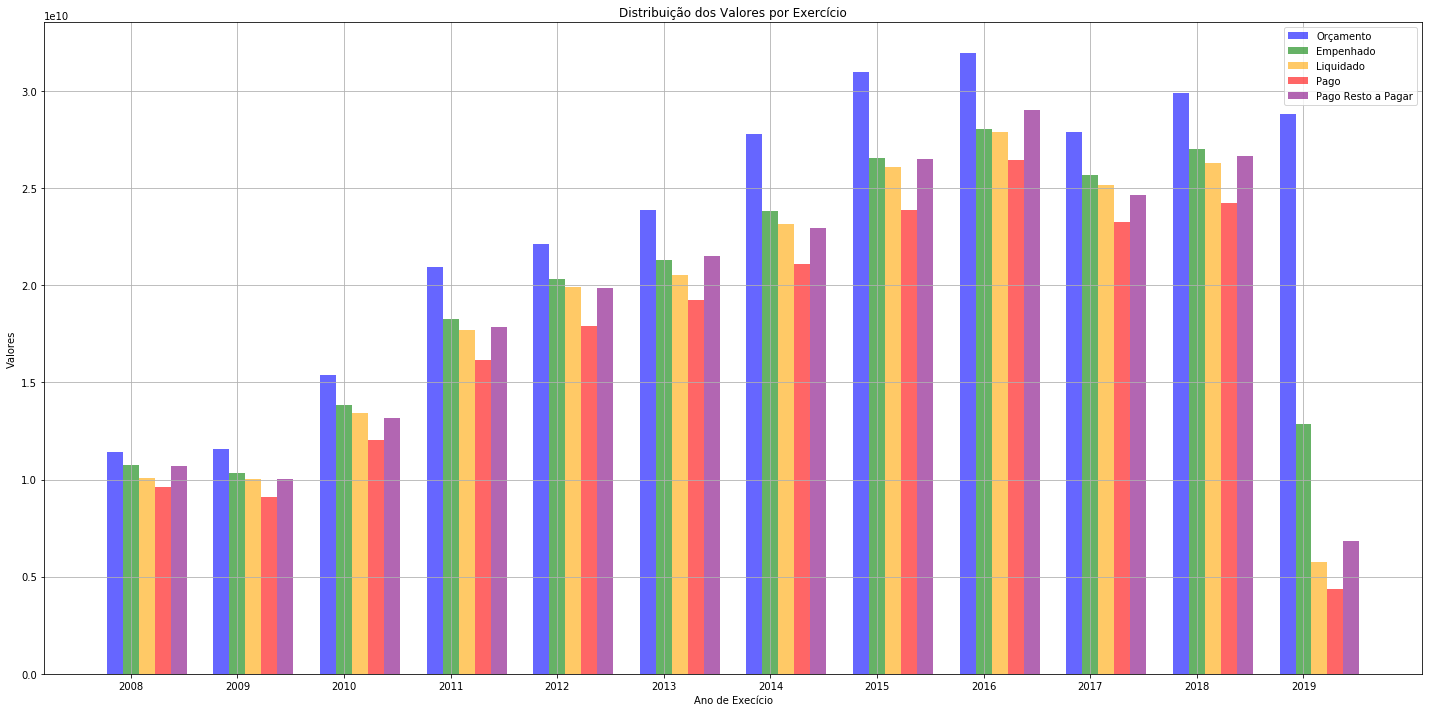

In [11]:
# Plotando a distribuição dos valores por Exercício

# Categorias do eixo X
exercicio = df_total_exercicio['Exercicio'].values

# Dados para plotagem
num_grupos = len(exercicio)

orcamento = df_total_exercicio['Orcamento_Atualizado'].values
empenhado = df_total_exercicio['Empenhado'].values
liquidado = df_total_exercicio['Liquidado'].values
pago = df_total_exercicio['Pago'].values
pago_resto = df_total_exercicio['Pago_Restos_Pagar'].values
 
# Criando o plot
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
index = np.arange(num_grupos)
bar_width = 0.15
opacity = 0.6
 
ax.bar(index,                 orcamento,  bar_width, alpha=opacity, color='blue',     label='Orçamento')
ax.bar(index + (bar_width),   empenhado,  bar_width, alpha=opacity, color='green',    label='Empenhado')
ax.bar(index + (bar_width*2), liquidado,  bar_width, alpha=opacity, color='orange',   label='Liquidado')
ax.bar(index + (bar_width*3), pago,       bar_width, alpha=opacity, color='red',      label='Pago')
ax.bar(index + (bar_width*4), pago_resto, bar_width, alpha=opacity, color='purple',   label='Pago Resto a Pagar')


plt.title('Distribuição dos Valores por Exercício')
plt.xlabel('Ano de Execício')
plt.ylabel('Valores')
plt.legend(loc = 'upper right')

ax.set_xticklabels(exercicio)
plt.xticks(index + bar_width)

plt.tight_layout()
plt.grid(True)
plt.show()

In [12]:
# Define a função para agrupamento de um ou mais atributo por um determinado valor, nesse agrupamento sempre é considerando o Exercício (ano).
def agrupaValorAtributo(agrupar_atributo, valor_agrupar):
   
    colunasGroupBy = [ 'Exercicio', agrupar_atributo]
    colunas = ['Exercicio', agrupar_atributo, valor_agrupar]

    df_agrupado = df_execucao[colunas].groupby(colunasGroupBy, as_index = False, sort=True).agg({valor_agrupar: 'sum'})

    return df_agrupado
    

In [13]:
# Define a função que retorna uma lista dataframe separados por Exercício (ano).
def getListaDataFrameAtributosPorAno(df_agrupado, atributo, valor):

    # Cria uma lista com todos os anos de exercício
    anos_exercicio = df_agrupado['Exercicio'].unique()

    # Cria uma lista de Dataframes de cada ano.
    list_df = []

    for ano in anos_exercicio:
        # Filtra os dados por ano.
        df_ano = df_agrupado[df_agrupado['Exercicio'] == ano]

        # Ordena os valores
        df_ano = df_ano.sort_values(by=[valor], ascending=False)

        # Converte a coluna do atributo para string
        df_ano[atributo] = df_ano[atributo].apply(str)

        # Pega os TOP maiores valores de orçamento
        df_top = df_ano[:top]

        # Calcula a adiciona a coluna outros.
        df_top_outros = df_top.reset_index(drop=True)
        df_top_outros.loc[len(df_top)] = [ano, '[ Outros ]',df_ano[top:][valor].sum()]

        list_df.append(df_top_outros)
    
    return list_df  
    

In [14]:
# Define a função para plotar um grafico de pizza por cada Exercicio (ano).
def plotaGraficoPizza(lista_df, atributo_analise, valor_analise, top, titulo,linhas_plot, colunas_plot):
    
    # Define o tamanho d figura do plot
    fig = plt.figure(figsize=(20,10))

    i = 1

    # Plota os graficos do Orçamento por Orgão de cada ano.
    for df in lista_df:

        ax = fig.add_subplot(linhas_plot, colunas_plot, i)
    

        # Dados do Plot
        df = df.sort_values(by=[valor_analise])
        dados = df[valor_analise].values
        ano = df['Exercicio'].max()
        labels = df[atributo_analise].unique()

        # Destada a fatia "Outros"
        explode = np.zeros(len(df))
        explode[len(explode)-1] = 0.1

        # Configura o plot
        plt.pie(dados , explode=explode,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

        plt.title('{0}: Top {1} em {2}'.format(titulo, top,  str(ano)))

        i+=1

    plt.tight_layout()
    plt.show()

In [15]:
# Define uma paleta de cores
paleta_cores = ['deepskyblue', 'green', 'orange', 'blue', 'gray', 'thistle', 'sienna', 'indigo', 'seagreen' , 'darkred',  'darkcyan', 'salmon', 'gold', 'tomato', 'skyblue', 'teal', 'steelblue', 'turquoise'   ]

# Define a função para plotar um grafico de Barra Horizontal  por cada Exercicio (ano).
def plotaGraficoBarraHorizontal(lista_df, atributo_analise, valor_analise, top, titulo, linhas_plot, colunas_plot):
    
    # Define o tamanho d figura do plot
    fig = plt.figure(figsize=(20,15))

    i = 1

    # Plota os graficos do Orçamento por Orgão de cada ano.
    for df in lista_df:

        ax = fig.add_subplot(linhas_plot, colunas_plot, i)
        
        # Dados do Plot
        df = df.sort_values(by=[valor_analise])
        dados = df[valor_analise].values
        ano = df['Exercicio'].max()
        labels = df[atributo_analise].unique()
        
        # Configura o plot
        index = np.arange(len(labels))
        bar_width = 0.3
        opacity = 1#0.6
        ax.barh(index, dados,  bar_width, alpha=opacity, color=paleta_cores[i-1],label=valor_analise)
        
        ax.set_yticks(index + bar_width)
        ax.set_yticklabels(labels)
        
        plt.xlabel('Valores')
        plt.ylabel(atributo_analise)
        plt.title('{0}: Top {1} em {2}'.format(titulo, top,  str(ano)))

        i+=1

    plt.tight_layout()
    plt.show()

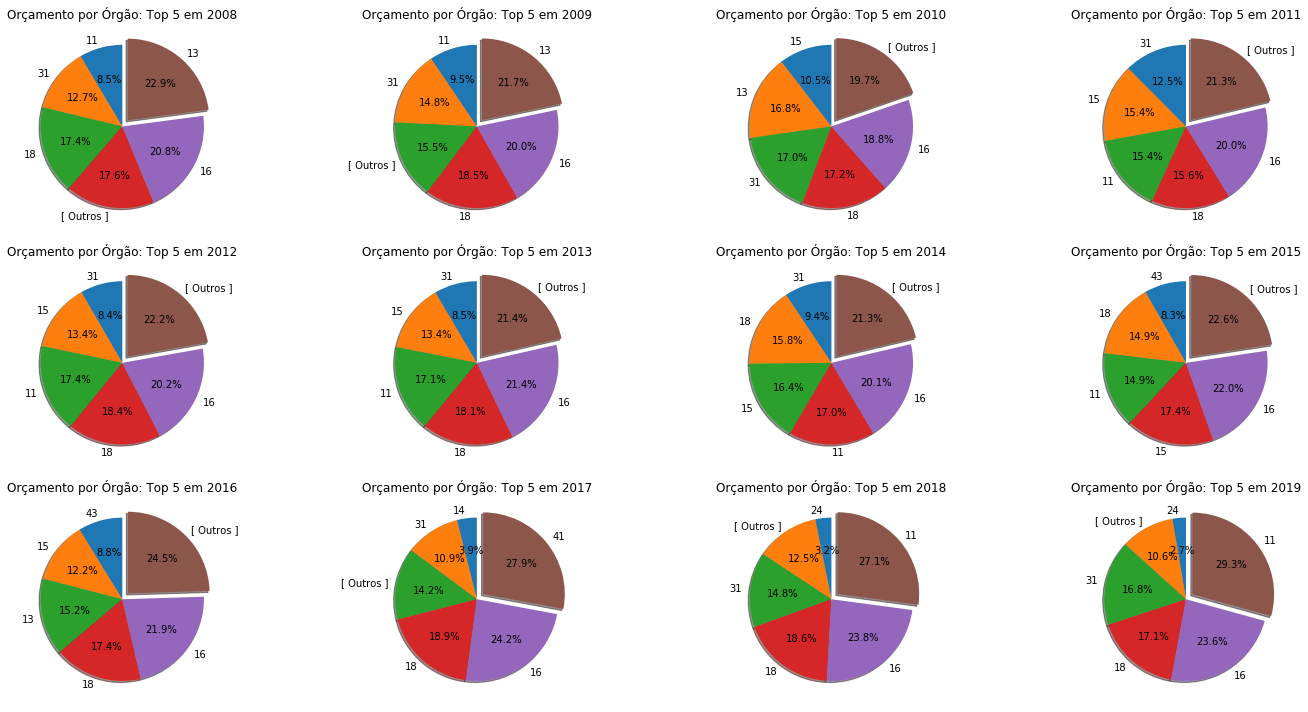

In [16]:
# Plotando alguns gráficos com diferentes agrupamento

# Agrupando o Valor Orcamento_Atualizado por Órgão

# Define o Atributo que será agrupado.
atributo_analise= 'Orgao'

#Define a valor que será análisado.
valor_analise = 'Orcamento_Atualizado'

#Define o título dos gráficos.
titulo = 'Orçamento por Órgão'

# Define o tamanho do "Top" que será considerado.
top = 5

df_agrupado = agrupaValorAtributo(atributo_analise, valor_analise)
lista_dataframes = getListaDataFrameAtributosPorAno(df_agrupado, atributo_analise, valor_analise)
plotaGraficoPizza(lista_dataframes,atributo_analise, valor_analise, top, titulo, 3, 4)

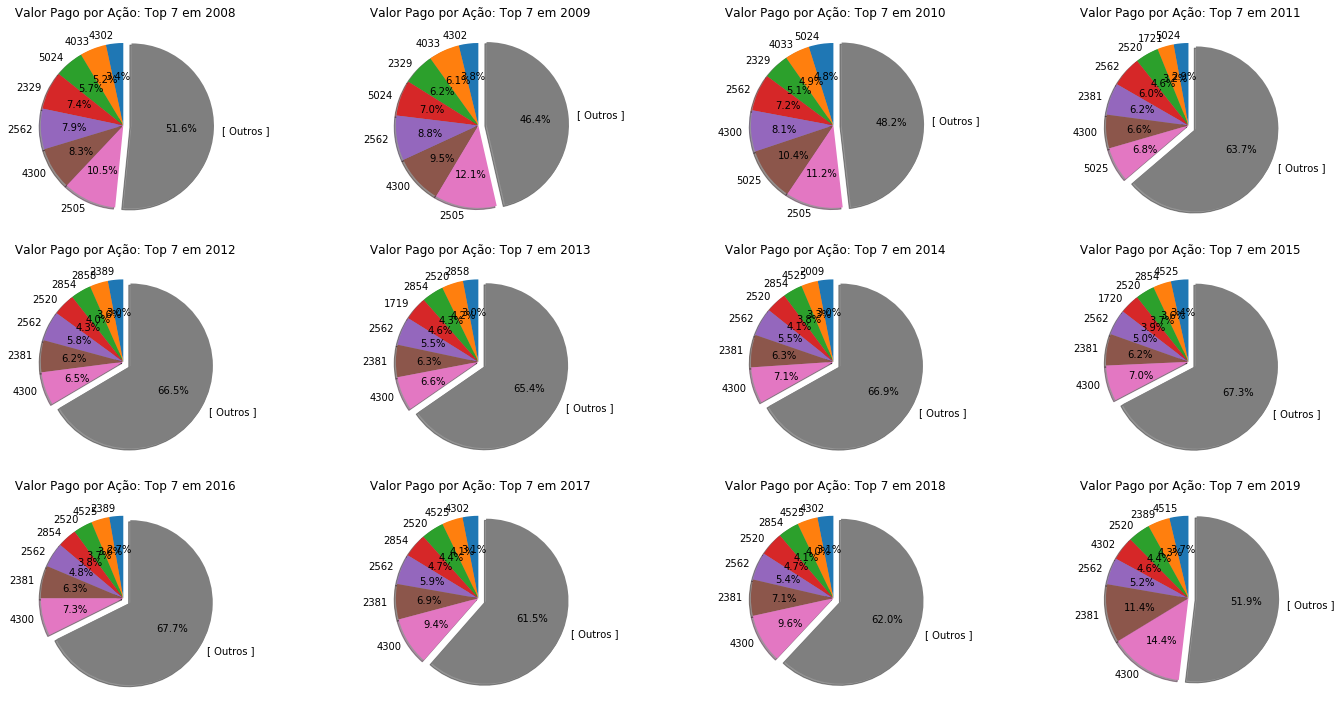

In [17]:
# Plotando alguns gráficos com diferentes agrupamento

# Agrupando o Valor Pago por Ação

# Define o Atributo que será agrupado.
atributo_analise= 'Acao'

#Define a valor que será análisado.
valor_analise = 'Pago'

#Define o título dos gráficos.
titulo =   ' Valor Pago por Ação'
# Define o tamanho do "Top" que será considerado.
top = 7

df_agrupado = agrupaValorAtributo(atributo_analise, valor_analise)
lista_dataframes = getListaDataFrameAtributosPorAno(df_agrupado, atributo_analise, valor_analise)
plotaGraficoPizza(lista_dataframes,atributo_analise, valor_analise, top, titulo, 3, 4)

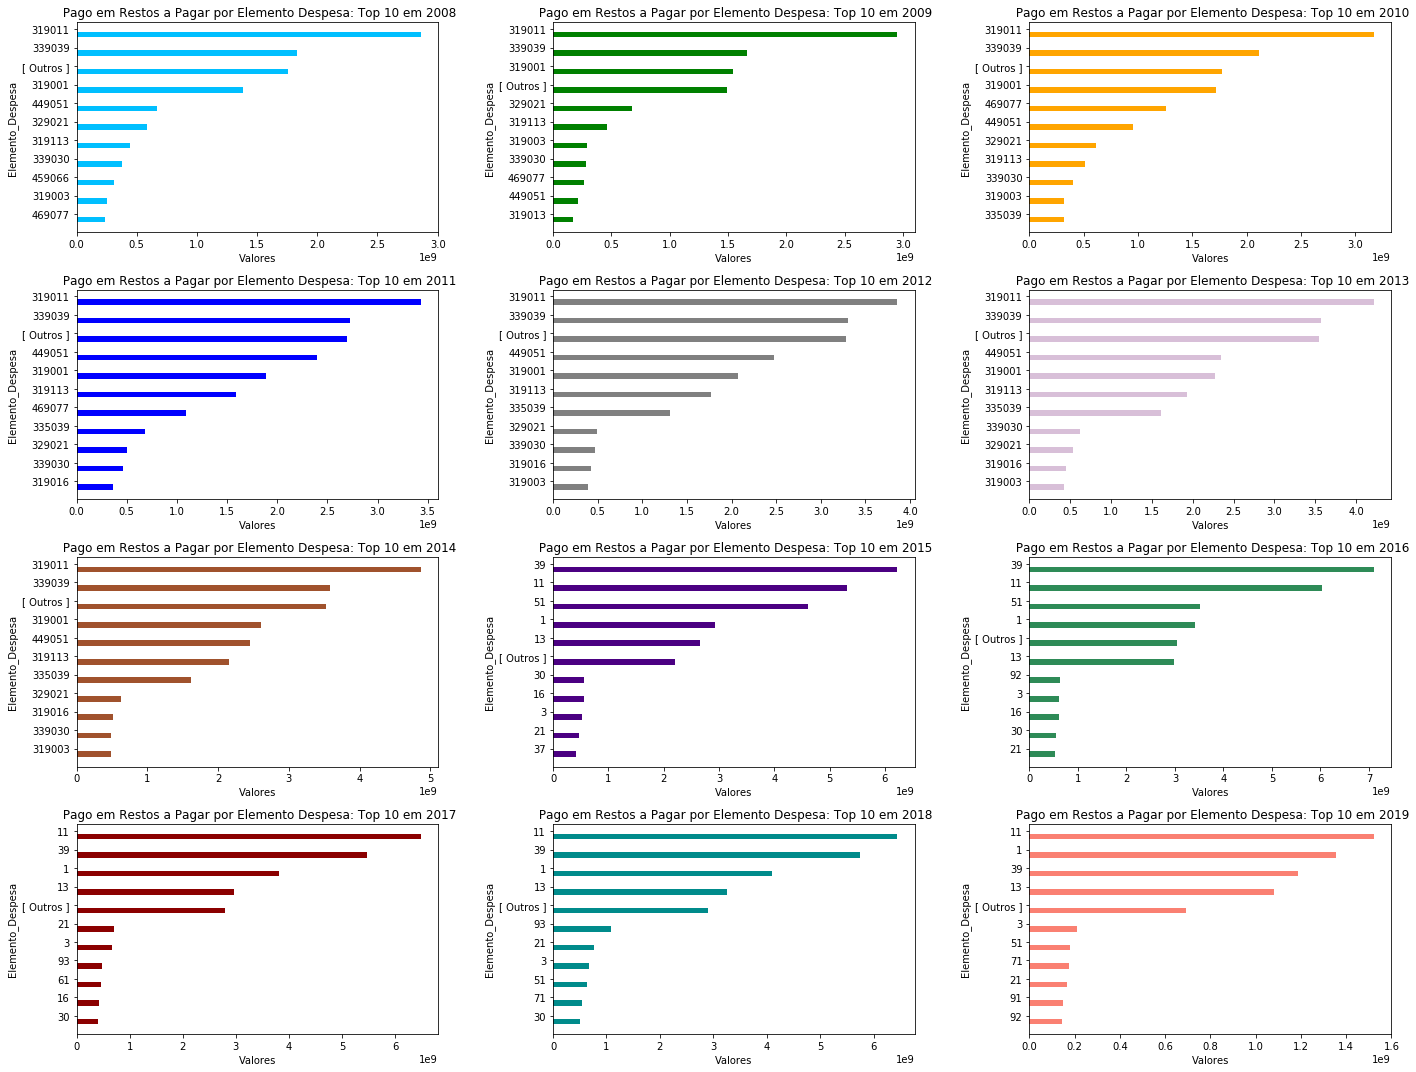

In [18]:
# Plotando alguns gráficos com diferentes agrupamento

# Agrupando o Valor Pago_Restos_Pagar por Elemento_Despesa

# Define o Atributo que será agrupado.
atributo_analise= 'Elemento_Despesa'

#Define a valor que será análisado.
valor_analise = 'Pago_Restos_Pagar'

#Define o título dos gráficos.
titulo = ' Pago em Restos a Pagar por Elemento Despesa'

# Define o tamanho do "Top" que será considerado.
top = 10

df_agrupado = agrupaValorAtributo(atributo_analise, valor_analise)
lista_dataframes = getListaDataFrameAtributosPorAno(df_agrupado, atributo_analise, valor_analise)
plotaGraficoBarraHorizontal(lista_dataframes,atributo_analise, valor_analise, top, titulo, 4,3 )

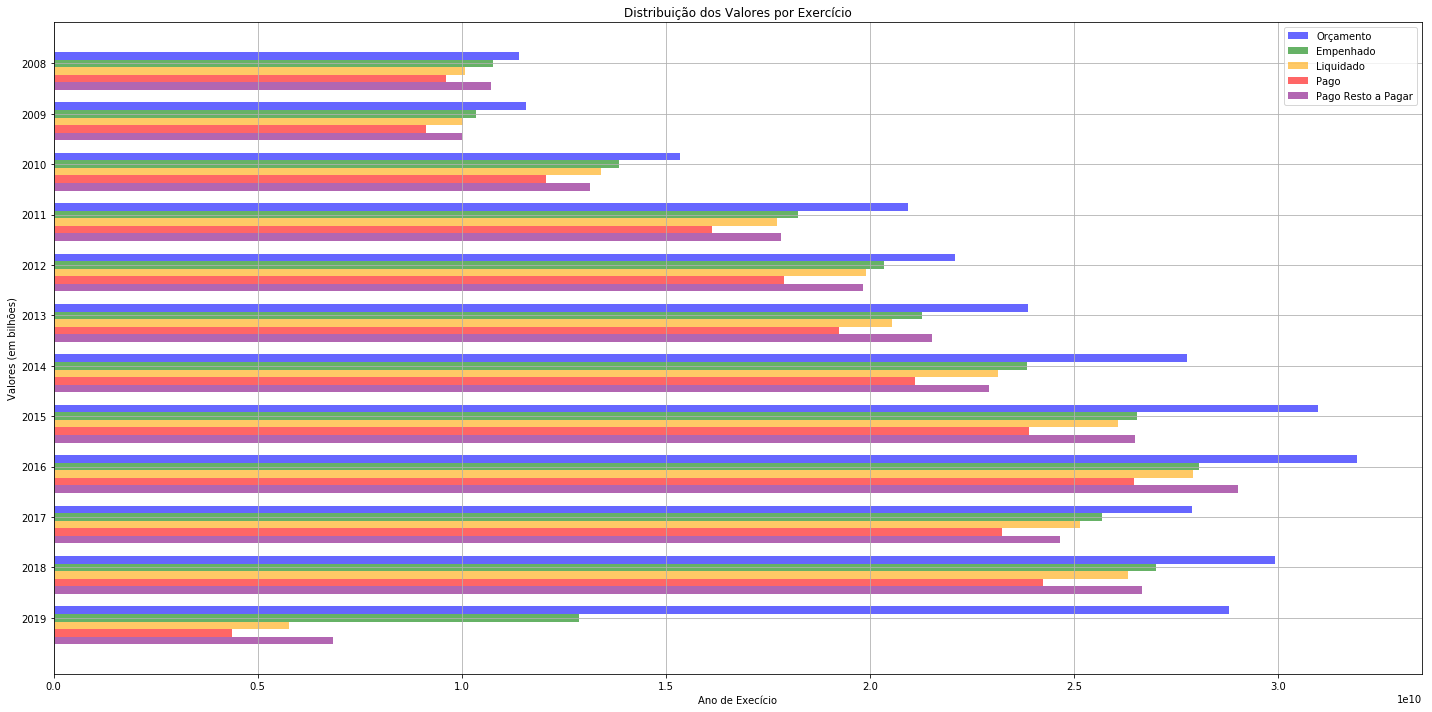

In [19]:

# Categorias do eixo X
exercicio = df_total_exercicio['Exercicio'].values

# Dados para plotagem
num_grupos = len(exercicio)

orcamento = df_total_exercicio['Orcamento_Atualizado'].values
empenhado = df_total_exercicio['Empenhado'].values
liquidado = df_total_exercicio['Liquidado'].values
pago = df_total_exercicio['Pago'].values
pago_resto = df_total_exercicio['Pago_Restos_Pagar'].values
 

# Criando o plot
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
index = np.arange(num_grupos)
bar_width = 0.15
opacity = 0.6
 
ax.barh(index,                 orcamento,  bar_width, alpha=opacity, color='blue',     label='Orçamento')
ax.barh(index + (bar_width),   empenhado,  bar_width, alpha=opacity, color='green',    label='Empenhado')
ax.barh(index + (bar_width*2), liquidado,  bar_width, alpha=opacity, color='orange',   label='Liquidado')
ax.barh(index + (bar_width*3), pago,       bar_width, alpha=opacity, color='red',      label='Pago')
ax.barh(index + (bar_width*4), pago_resto, bar_width, alpha=opacity, color='purple',   label='Pago Resto a Pagar')


plt.title('Distribuição dos Valores por Exercício')
plt.xlabel('Ano de Execício')
plt.ylabel('Valores (em bilhões)')
plt.legend(loc = 'upper right')


ax.set_yticks(index + bar_width)
ax.set_yticklabels(exercicio)


#ax.set_xticklabels(exercicio)
#plt.xticks(index + bar_width)

ax.invert_yaxis()  # labels read top-to-bottom


plt.tight_layout()
plt.grid(True)
plt.show()

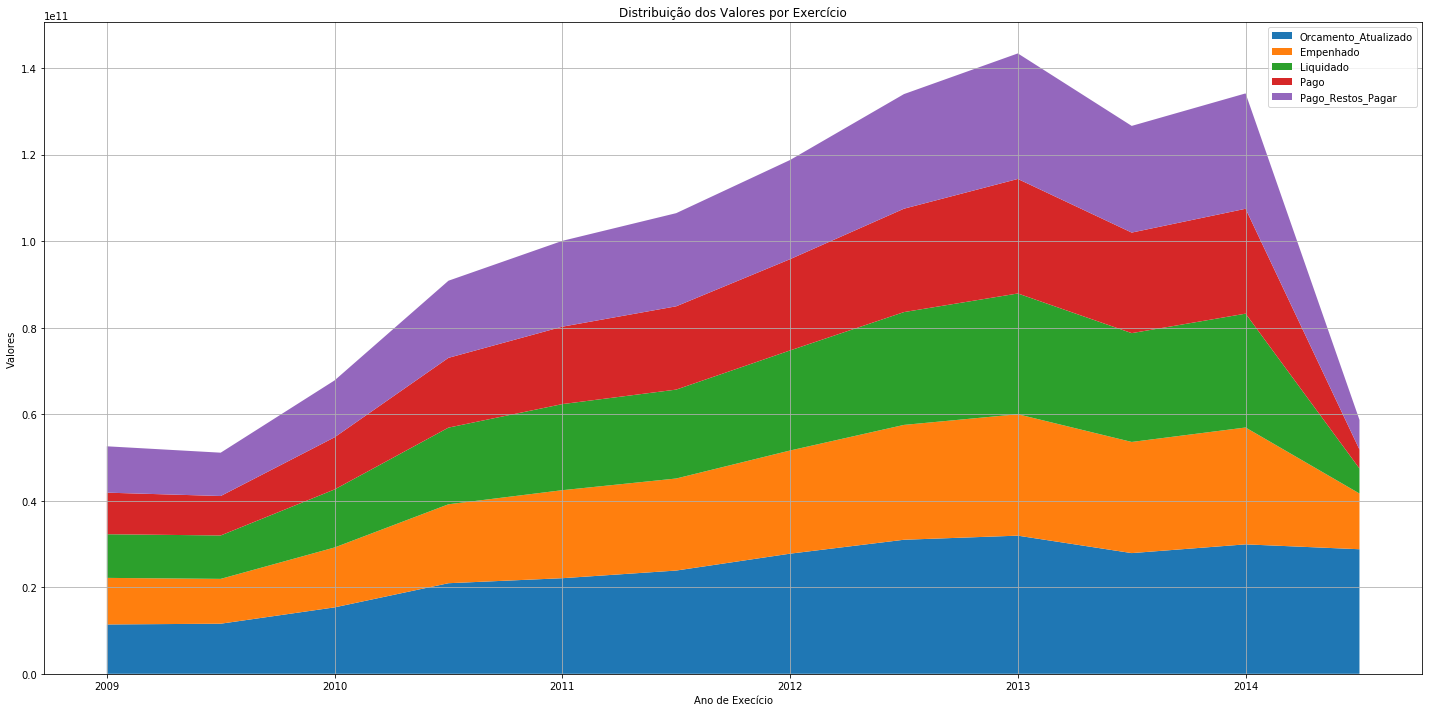

In [20]:
# Mostra a proporção do total que cada valor representa em para o Exercício (ano).

# Categorias do eixo X
exercicio = df_total_exercicio['Exercicio'].values

# Dados para plotagem
num_grupos = len(exercicio)

orcamento = df_total_exercicio['Orcamento_Atualizado'].values
empenhado = df_total_exercicio['Empenhado'].values
liquidado = df_total_exercicio['Liquidado'].values
pago = df_total_exercicio['Pago'].values
pago_resto = df_total_exercicio['Pago_Restos_Pagar'].values
 

# Criando o plot
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
index = np.arange(num_grupos)
bar_width = 0.15
opacity = 1

labels = ['Orcamento_Atualizado', 'Empenhado', 'Liquidado', 'Pago', 'Pago_Restos_Pagar']
 
ax.stackplot(index,                 orcamento, empenhado, liquidado, pago, pago_resto , alpha=opacity, labels=labels)
ax.legend(loc = 'upper right')

plt.title('Distribuição dos Valores por Exercício')
plt.xlabel('Ano de Execício')
plt.ylabel('Valores')


ax.set_xticklabels(exercicio)

plt.tight_layout()
plt.grid(True)
plt.show()

In [22]:
# Define a função para Agrupamento dos valores de um atributos pelo Exercício (ano).
def agrupaValoresAtributoPorExercico(agrupar_atributo, valores_agrupar, funcao_agregacao):

    valores_aggregacao = {}
   
    for campo in valores_agrupar:
        valores_aggregacao[campo]=  funcao_agregacao 

    colunasGroupBy = [ agrupar_atributo, 'Exercicio']
    colunas = [agrupar_atributo, 'Exercicio'] + valores_agrupar

    df_agrupado = df_execucao[colunas].groupby(colunasGroupBy, as_index = False).agg(valores_aggregacao).sort_values(by=colunas)

    return df_agrupado
    

In [23]:
top = 3
titulo = 'teste'


atributo_analise = 'Acao'
valores_agrupar = ['Orcamento_Atualizado', 'Empenhado', 'Liquidado', 'Pago', 'Pago_Restos_Pagar']
funcao_agregacao = 'sum'

df_agrupado = agrupaValoresAtributoPorExercico(atributo_analise, valores_agrupar, funcao_agregacao)
#df_agrupado
#df_lista = getListaDataFramesAtributo(df_agrupado, atributo_analise, valores_agrupar)

In [24]:
# Define a função que retorna os Tops atributos com maiores valores.
def getDataFramesTopAtributoValor(df_agrupado, atributo_analise, valores, top):
    
     # Cria uma lista com todos os elementos do atributo.
    atributos = df_agrupado[atributo_analise].unique()  

    # Adiciona uma coluna com a soma dos valores.
    df_agrupado.loc[:, 'SomaValores'] = df_agrupado.loc[:,valores].sum(axis=1)
    
    # Cria um dataframe com o total da coluna SomaValores para o atrito considerando todas as linhas.
    df_total_soma = df_agrupado.groupby(atributo_analise, as_index=False)['SomaValores'].sum()
    
    # Faz o join dos dataframes.
    df_merge = pd.merge(df_agrupado.drop(columns=['SomaValores']), df_total_soma, on=atributo_analise, how='inner')
    
    # Ordena o dataframe pela coluna 
    df_merge = df_merge.sort_values(by=['SomaValores'], ascending=False)
    
    # Cria uma lista de Dataframes de 
    list_df_top = []

    for item in atributos:
        
        # Seleciona os dados do item.
        df_atributo = df_merge[df_merge[atributo_analise] == item]
        
        list_df_top.append(df_atributo)
        
        if len(list_df_top) == top:
            break
        

    return list_df_top
      
    

In [25]:
lista_df= getDataFramesTopAtributoValor(df_agrupado, atributo_analise, valores_agrupar, 7)


In [26]:
#df_li

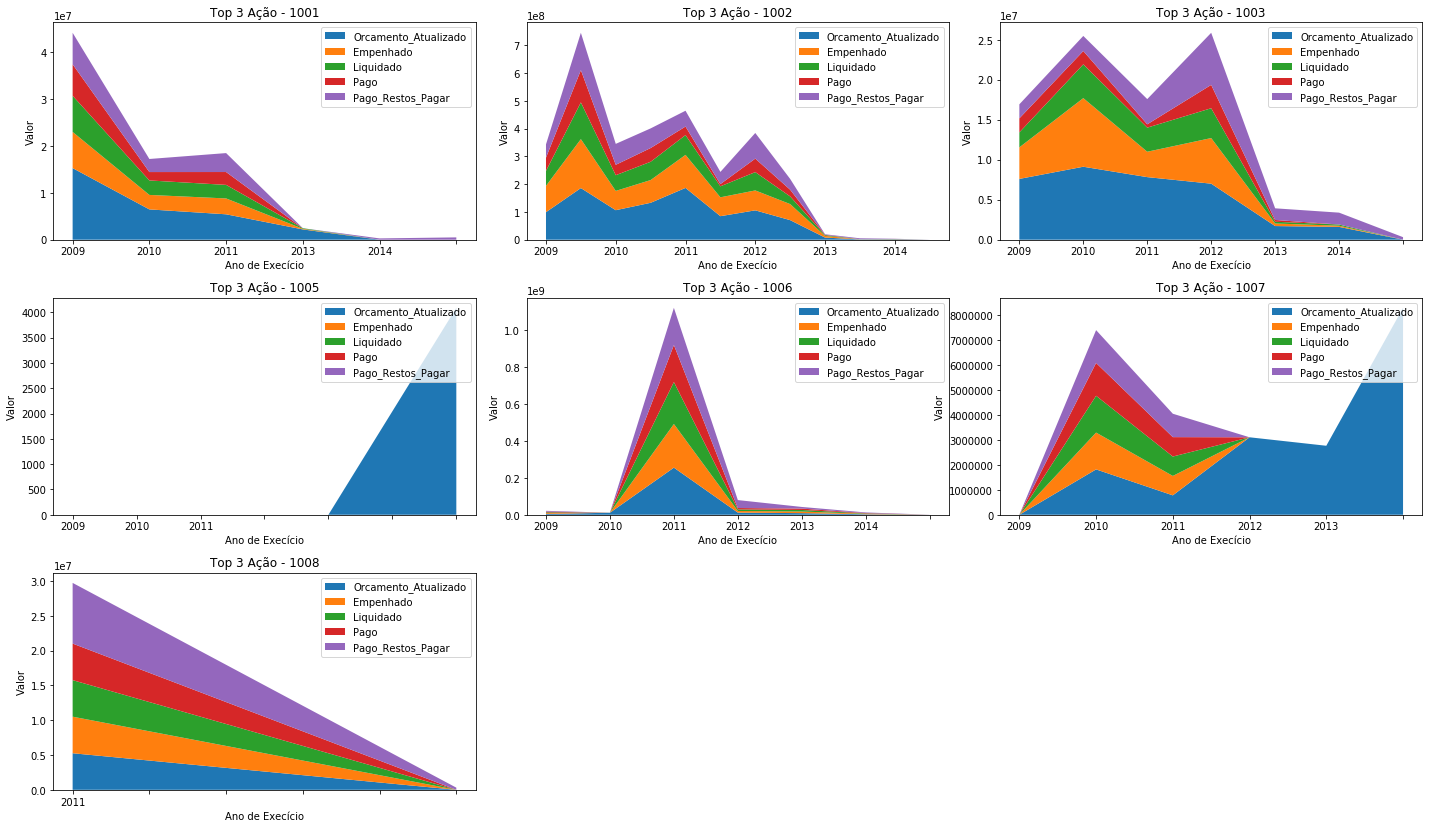

In [27]:
# Mostra a proporção do total que cada valor representa em para o Exercício (ano).

titulo = 'Ação'
valores = valores_agrupar

# Define o tamanho d figura do plot
fig = plt.figure(figsize=(20,15))

# Quantidade de linhas do plot
colunas_plot = 3
linhas_plot = 4

i = 1

for df in lista_df:
     
    ax = fig.add_subplot(linhas_plot, colunas_plot, i)

    # Dados para plotagem
    df = df.sort_values(by=['Exercicio'])
    exercicio = df['Exercicio'].values
    atributo = df[atributo_analise].max()
    num_grupos = len(exercicio)
    
    
    orcamento = df['Orcamento_Atualizado'].values
    empenhado = df['Empenhado'].values
    liquidado = df['Liquidado'].values
    pago = df['Pago'].values
    pago_resto = df['Pago_Restos_Pagar'].values
    

    # Criando o plot
    index = np.arange(num_grupos)
    bar_width = 0.15
    opacity = 1

    ax.stackplot(index, orcamento, empenhado, liquidado, pago, pago_resto , alpha=opacity, labels=valores)
    
    ax.legend(loc = 'best')
    ax.set_xticklabels(exercicio)

    plt.title('Top {0} {1} - {2}'.format(top, titulo,  str(atributo)))
    plt.xlabel('Ano de Execício')
    plt.ylabel('Valor')
    
    i+=1

plt.tight_layout()
plt.show()

In [ ]:
df_merge.head(2)

In [ ]:
df_agrupado.loc[:, 'SomaValores'] = df_agrupado.loc[:,valores_agrupar].sum(axis=1)
a = df_agrupado.groupby('Acao', as_index=False)['SomaValores'].sum()
a.head(6)

# Faz o join dos dataframes
df_merge = pd.merge(df_agrupado.drop(columns=['SomaValores']), a, on='Acao', how='inner')
df_merge.head(30)

df_merge = df_merge.sort_values(by=['SomaValores'], ascending=False)

In [ ]:
#df_agrupado = 
df_agrupado.drop(columns=['SomaValores']);

In [ ]:
df_lista.sort(key=lambda x:x.sort_values(by=valores_agrupar, ascending=False).empty, reverse=True)
df_lista[:3]

In [ ]:
# Define o tamanho d figura do plot
fig = plt.figure(figsize=(20,15))

# Quantidade de linhas do plot
linhas_plot = 3

i = 1
    
for df in df_lista:

    # Mostra a proporção do total que cada valor representa em para o Exercício (ano).

    # Categorias do eixo X
    itens = df[atributo_analise].values

    # Dados para plotagem
    num_grupos = len(itens)

    orcamento = df['Orcamento_Atualizado'].values
    empenhado = df['Empenhado'].values
    liquidado = df['Liquidado'].values
    pago = df['Pago'].values
    pago_resto = df['Pago_Restos_Pagar'].values
    
    dados_lista = []
    
    for val in valores_agrupar:
        dados_lista.append(df[val])
        


    # Criando o plot
    fig = plt.figure(figsize=(20,10))
    ax = fig.subplots()
    index = np.arange(num_grupos)
    bar_width = 0.15
    opacity = 1

    labels = ['Orcamento_Atualizado', 'Empenhado', 'Liquidado', 'Pago', 'Pago_Restos_Pagar']

    #ax.stackplot(index,                 orcamento, empenhado, liquidado, pago, pago_resto , alpha=opacity, labels=labels)
    ax.stackplot(index,                 dados_lista , alpha=opacity, labels=labels)
    ax.legend(loc = 'upper right')

    plt.title('Distribuição dos Valores por Exercício')
    plt.xlabel('Ano de Execício')
    plt.ylabel('Valores')


    ax.set_xticklabels(itens)

    plt.tight_layout()
    plt.grid(True)
    plt.show()

In [ ]:
df_execucao[colunas].groupby(colunasGroupBy, as_index = False).agg(valores_aggregacao)

In [ ]:
categoria_agrupar = 'Orgao'
valores_agrupar = ['Orcamento_Atualizado', 'Empenhado', 'Liquidado', 'Pago', 'Pago_Restos_Pagar']

valores_aggregacao = {}
funcao_agregacao = 'sum'

for i in valores_agrupar:
    valores_aggregacao[i]=  funcao_agregacao 

colunasGroupBy = [ categoria_agrupar, 'Exercicio']
colunas = [categoria_agrupar, 'Exercicio'] + valores_agrupar

df_agrupado = df_execucao[colunas].groupby(colunasGroupBy, as_index = False).agg(valores_aggregacao)
df_agrupado

In [ ]:

df_dicionario_acao = df_execucao[['Acao','Descricao_Acao']].groupby('Acao', as_index = False).agg({'Descricao_Acao': 'max'})
df_dicionario_acao['Acao'] = df_dicionario_acao['Acao'].apply(str)
#df_dicionario_acao[df_dicionario_acao['Acao'] == 4525]
df_dicionario_acao.set_index('Acao')

In [ ]:
df = lst[1]


In [ ]:
df.set_index('Acao')  

In [ ]:
# Faz o join dos dataframes
df_merge = pd.merge(df, df_dicionario_acao, on='Acao', how='left')
df_merge